In [7]:
import requests as r
import pandas as pd

In [3]:

data = {}
for year in range(14):
    year = year + 2002
    print year
    res = r.get('http://chicago.bnroths.com/data/eigs-chicago-zillow-opposite-S000/%s/1.json' % year).json()
    
    for a in res['data']:
        if a not in data:
            data[a] = []
        data[a].append(res['data'][a]['real'])

print data
    


2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


{u'Mayfair': [23.9, 22.9, 0.0, 20.9, 23.1, 30.1, 23.0, 23.0, 24.3, 25.6, 25.0, 25.7, 26.2, 25.7], u'Magnolia Glen': [21.6, 21.3, 0.0, 22.2, 21.0, 16.6, 21.9, 13.4, 24.9, 22.3, 22.7, 22.2, 23.1, 23.2], u'Kenwood': [13.8, 12.3, 0.0, 9.8, 12.5, 14.0, 11.8, 13.3, 13.0, 12.0, 13.2, 11.6, 13.2, 13.7], u'Grand Crossing': [48.9, 45.4, 0.0, 49.0, 49.6, 44.9, 50.1, 39.0, 39.7, 38.1, 40.4, 36.5, 40.0, 43.5], u'Jefferson Park': [159.0, 163.9, 0.0, 168.0, 164.4, 187.5, 183.3, 172.7, 180.2, 183.4, 177.7, 181.9, 178.5, 161.9], u'Sauganash Woods': [4.5, 4.8, 0.0, 6.2, 5.5, 6.9, 6.6, 7.1, 6.1, 6.7, 7.2, 6.4, 6.6, 6.2], u'Little Calumet River': [21.7, 23.1, 0.0, 24.2, 23.1, 13.2, 14.8, 18.3, 14.8, 12.2, 11.5, 12.7, 11.3, 13.4], u'Lake View East': [84.4, 91.3, 0.0, 101.5, 107.0, 88.1, 103.8, 78.6, 105.7, 120.0, 112.6, 108.8, 107.0, 109.0], u'East Chatham': [35.3, 34.8, 0.0, 29.3, 28.7, 40.2, 37.2, 42.4, 22.0, 24.5, 27.1, 25.9, 31.2, 35.4], u'Belmont Gardens': [49.9, 50.2, 0.0, 43.5, 43.3, 39.7, 51.7, 38.

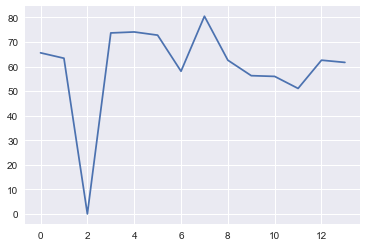

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(data['Hyde Park'])
#plt.plot(data['Gold Coast'])

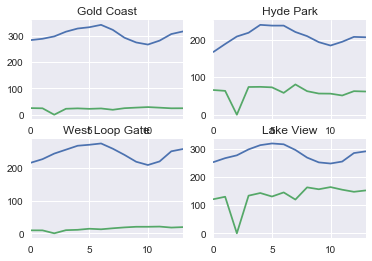

In [12]:
plt.figure(1)
plt.subplot(2,2,1)
for i, hood in enumerate(['Gold Coast', 'Hyde Park', 'West Loop Gate', 'Lake View']):
    plt.subplot(2,2,i+1)
    place = pd.DataFrame({
        'eigenvalues': data[hood], 
        'zillow': list(zillow[zillow.RegionName == hood].values)[0][1:]})
    place['zillow'].plot()
    place['eigenvalues'].plot(title=hood)

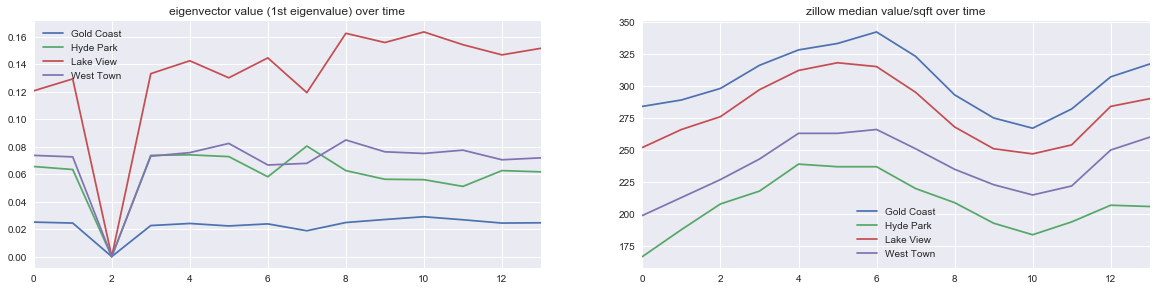

In [13]:
plt.figure(1, figsize=(20,10))
plt.subplot(2,2,1)
hoods = ['Gold Coast', 'Hyde Park', 'West Town', 'Lake View']
place = pd.DataFrame({
    hoods[0]: [x/1000 for x in data[hoods[0]]],
    hoods[1]: [x/1000 for x in data[hoods[1]]],
    hoods[2]: [x/1000 for x in data[hoods[2]]],
    hoods[3]: [x/1000 for x in data[hoods[3]]],
})
place.plot(ax=plt.gca(), title="eigenvector value (1st eigenvalue) over time")
plt.subplot(2,2,2)
place = pd.DataFrame({
    hoods[0]: list(zillow[zillow.RegionName == hoods[0]].values)[0][1:],
    hoods[1]: list(zillow[zillow.RegionName == hoods[1]].values)[0][1:],
    hoods[2]: list(zillow[zillow.RegionName == hoods[2]].values)[0][1:],
    hoods[3]: list(zillow[zillow.RegionName == hoods[3]].values)[0][1:]
})
place.plot(ax=plt.gca(), title="zillow median value/sqft over time")

In [15]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import numpy as np
# y = np.asarray(place['zillow'])
# x = np.asarray(place['eigenvalues'])
# res = smf.OLS(y, x).fit()
# print(res.summary())

In [108]:
place['eigenvalues']

0      4.6
1     15.6
2     15.2
3     20.9
4     11.4
5      6.0
6      6.7
7      8.1
8      4.8
9      5.2
10     5.3
11     5.6
12     5.7
13     4.8
Name: eigenvalues, dtype: float64

In [10]:
import pandas as pd
zillow = pd.read_csv('Neighborhood_MedianValuePerSqft_AllHomes.csv')

In [11]:
zillow = zillow[(zillow.City == 'Chicago')][[
    'RegionName',
    '2002-01',
    '2003-01',
    '2004-01',
    '2005-01',
    '2006-01',
    '2007-01',
    '2008-01',
    '2009-01',
    '2010-01',
    '2011-01',
    '2012-01',
    '2013-01',
    '2014-01',
    '2015-01']]